In [27]:
import pandas as pd
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

### Task1: 
Read all files from the Baby Name Dataset into a single DataFrame. 
The DataFrame should have the columns name, gender, number and year.

In [4]:
files = glob.glob("names/*.txt")

df_l = []
for f in files:
    csv = pd.read_csv(f,names=['name', 'gender', 'number'])
    csv['year'] = f[9:][:4]
    df_l.append(csv)

df = pd.concat(df_l, ignore_index=True)
df

,name,gender,number,year
0,Emily,F,25957,2000
1,Hannah,F,23085,2000
2,Madison,F,19968,2000
3,Ashley,F,17997,2000
4,Sarah,F,17708,2000
...,...,...,...,...
2052776,Zyheem,M,5,2019
2052777,Zykel,M,5,2019
2052778,Zyking,M,5,2019
2052779,Zyn,M,5,2019


### Task2: 
Create an extra column with the last letter of each name.
Create string indexes for an entire column with the expression

In [13]:
df['last_letter'] = df['name'].str.strip().str[-1].str.upper()
df

,name,gender,number,year,last_letter
0,Emily,F,25957,2000,Y
1,Hannah,F,23085,2000,H
2,Madison,F,19968,2000,N
3,Ashley,F,17997,2000,Y
4,Sarah,F,17708,2000,H
...,...,...,...,...,...
2052776,Zyheem,M,5,2019,M
2052777,Zykel,M,5,2019,L
2052778,Zyking,M,5,2019,G
2052779,Zyn,M,5,2019,N


### Task 3 : 
Create a bar plot showing the count of each last letter.

<AxesSubplot:xlabel='last_letter'>

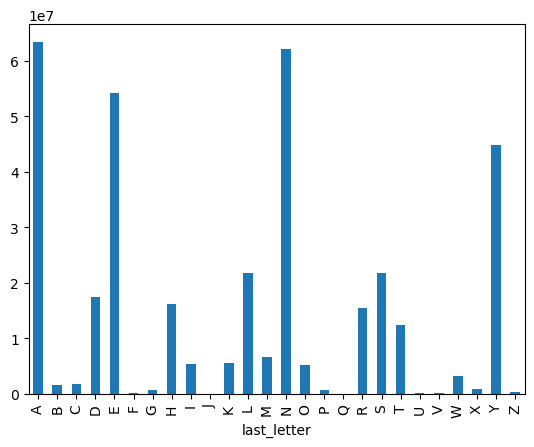

In [14]:
df.groupby('last_letter')['number'].sum().plot.bar()

### Task4: 
Now, create a timeline for one last letter.
First, select that letter over all years. 
Second, group by the year and calculate the count for each year. 

In [17]:
df_a = df[df['last_letter']=='A'].sort_values('year')

<AxesSubplot:xlabel='year'>

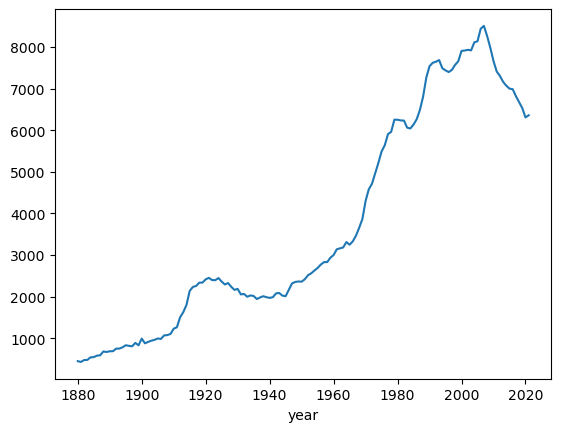

In [18]:
df_a.groupby('year')['number'].count().plot()

### Task 5: 
Let's plot multiple timelines.
Count the names grouped by last letter and year. Use the expression:

In [19]:
df_ly = df.groupby(['last_letter', 'year'])['name'].count()
df_ly

last_letter  year
A            1880    450
             1881    432
             1882    478
             1883    480
             1884    543
                    ... 
Z            2017    160
             2018    161
             2019    155
             2020    163
             2021    159
Name: name, Length: 3530, dtype: int64

This DataFrame has a hierarchical index.
Convert the DataFrame to a crosstable that has the year in the row index and the letters in the column index. 
You can do this with the expression

In [22]:
df_unstack = df_ly.unstack(0)
df_unstack

last_letter,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
year,,,,,,,,,,,,,,,,,,,,,
1880,450.0,7.0,7.0,93.0,490.0,7.0,9.0,60.0,7.0,NaN,...,NaN,89.0,125.0,76.0,5.0,1.0,7.0,4.0,148.0,4.0
1881,432.0,6.0,8.0,85.0,484.0,5.0,13.0,59.0,6.0,NaN,...,NaN,83.0,116.0,78.0,4.0,1.0,7.0,5.0,142.0,2.0
1882,478.0,7.0,8.0,96.0,538.0,8.0,10.0,70.0,6.0,NaN,...,NaN,87.0,124.0,83.0,3.0,1.0,8.0,5.0,167.0,4.0
1883,480.0,5.0,8.0,96.0,542.0,7.0,10.0,61.0,4.0,NaN,...,NaN,86.0,122.0,79.0,4.0,1.0,9.0,6.0,151.0,2.0
1884,543.0,10.0,7.0,101.0,584.0,6.0,10.0,72.0,4.0,NaN,...,NaN,100.0,133.0,83.0,4.0,1.0,7.0,4.0,179.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,6819.0,121.0,113.0,544.0,4091.0,78.0,124.0,2478.0,2424.0,75.0,...,26.0,1384.0,1172.0,504.0,152.0,90.0,52.0,157.0,2049.0,160.0
2018,6674.0,114.0,98.0,517.0,4009.0,80.0,111.0,2421.0,2503.0,71.0,...,28.0,1381.0,1179.0,488.0,155.0,88.0,51.0,165.0,2015.0,161.0
2019,6532.0,114.0,110.0,526.0,3965.0,73.0,99.0,2407.0,2658.0,71.0,...,22.0,1424.0,1195.0,471.0,157.0,87.0,52.0,170.0,2031.0,155.0


Draw a line plot showing the frequency of the letters d, n and y.
Try other ones if you like.

<AxesSubplot:xlabel='year'>

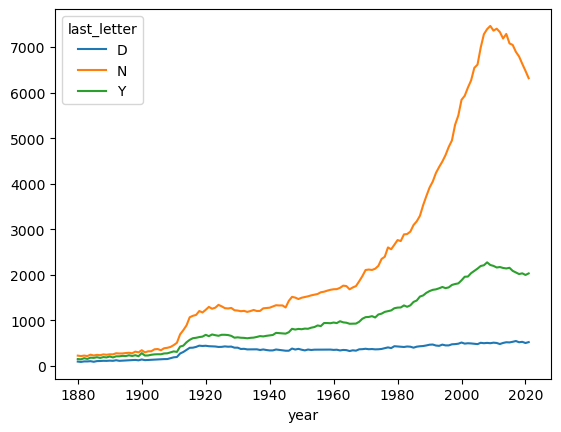

In [23]:
letters = ['D', 'N', 'Y']
df_unstack[letters].plot()

### Task6: 
Finally, let's look for frequent first/last letter combinations.
Add an extra column containing the first letter.

In [24]:
df['first_letter'] = df['name'].str.strip().str[0]
df

,name,gender,number,year,last_letter,first_letter
0,Emily,F,25957,2000,Y,E
1,Hannah,F,23085,2000,H,H
2,Madison,F,19968,2000,N,M
3,Ashley,F,17997,2000,Y,A
4,Sarah,F,17708,2000,H,S
...,...,...,...,...,...,...
2052776,Zyheem,M,5,2019,M,Z
2052777,Zykel,M,5,2019,L,Z
2052778,Zyking,M,5,2019,G,Z
2052779,Zyn,M,5,2019,N,Z


Cross-tabulate by grouping by first and last letter and count the names (over all years).

In [37]:
df_lf = df.groupby(['last_letter', 'first_letter'])['name'].count()
df_lf

last_letter  first_letter
a            a               144032
             b                 1139
             c                 1001
             d                 7118
             e                87543
                              ...  
z            t                   12
             u                  741
             v                   26
             y                  114
             z                   91
Name: name, Length: 568, dtype: int64

In [25]:
df_crosstab = pd.crosstab(df['first_letter'], df['last_letter'])
df_crosstab

last_letter,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
first_letter,,,,,,,,,,,,,,,,,,,,,
A,66332,398,744,3247,31096,526,221,11989,8853,321,...,70,6752,10158,2498,691,346,433,616,9094,810
B,13044,239,157,3022,16117,45,187,2537,2400,79,...,0,2643,2047,3878,354,54,242,310,9276,329
C,29486,430,378,2138,31701,206,803,1966,3858,65,...,0,5773,7076,2252,173,7,37,76,12015,761
D,32302,43,1092,3117,26567,43,371,3898,4753,105,...,28,2250,8309,1416,194,158,421,193,8759,390
E,23524,151,514,2503,18068,52,268,4459,2177,55,...,30,4737,2949,3487,468,15,54,176,4656,142
F,8495,0,291,1526,5676,0,192,976,485,6,...,37,1265,2139,804,63,0,1,338,2192,695
G,10762,63,20,2563,12163,199,509,1041,1911,25,...,0,2281,2453,1956,20,200,0,3,4630,28
H,6138,227,21,2686,6625,100,494,2580,2275,8,...,14,2499,1816,2331,202,8,116,94,5996,129
I,10835,4,760,428,3671,15,228,1781,1111,10,...,56,902,1688,209,212,2,0,0,1763,304


### Now you should have a table with first letters in columns an last letters in rows (or vice versa).
### Plot a heatmap

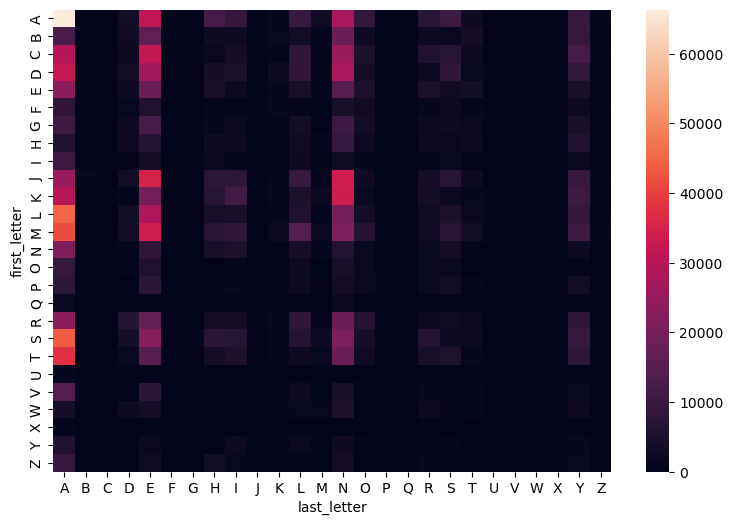

In [28]:
f, ax = plt.subplots(figsize=(9, 6))
plot = sns.heatmap(df_crosstab, ax=ax)

### Task7
Save your plots to .png files with 150 dpi.

In [29]:
plot.get_figure().savefig('df_crosstab.png', dpi=150)

### Task 8
What visualization(s) would you use to compare the last letters of girls and boys?

In [32]:
df_gen = df.groupby('gender')['last_letter'].value_counts().unstack(0)
df_gen_total = df['gender'].value_counts()

df_gen['female'] = (df_gen['F'] / df_gen_total['F'] * 100)
df_gen['male'] = (df_gen['M'] / df_gen_total['M'] * 100)

df_gen_percentages = df_gen[['female', 'male']]
df_gen_percentages

gender,female,male
last_letter,,
A,40.863782,3.475321
B,0.052898,0.515473
C,0.074388,0.723442
D,0.606927,4.944034
E,21.431464,12.189604
F,0.017771,0.452359
G,0.164316,0.711578
H,4.900873,2.840025
I,5.184541,3.069823


<AxesSubplot:xlabel='last letter', ylabel='% of gender'>

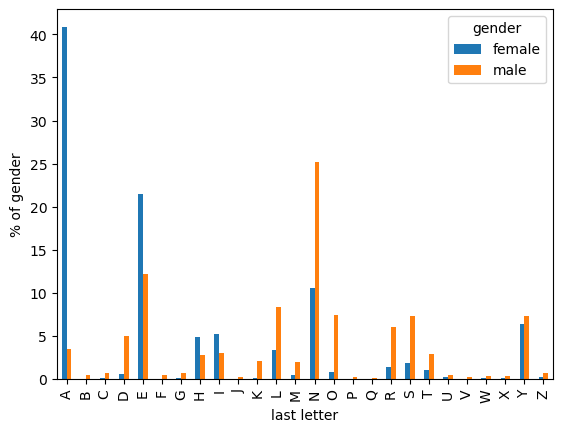

In [33]:
df_gen_percentages.plot.bar(
    ylabel='% of gender',
    xlabel='last letter',
    )